In [99]:
Pkg.add("SymPy");


INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [100]:
using SymPy;

In [25]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [26]:
using PyPlot;

In [101]:
A,x,E,n,m,g,L,t,c=symbols("A,x,E,n,m,g,L,t,c");

# Ejercicio 3

Se genera una rutina para integración con Sipmson

In [97]:
function integracionS(A,a,b,j)
    i=1
    x=0
    while a+i*j < b 
        h=a+i*j
        g=a+(i-1)*j
        I=(j/6)*(A(g)+A(h)+4*A((h+g)/2))
        x=x+I
        i=i+1
    end
    return x
end;

Ejemplo de integración con Simpson

In [7]:
integracionS(x^2,3,9,0.01)

233.190899666667

# Ejercicio 4

Se genera una rutina para la interpolación de una función a partir de los valores de la variable independiente

In [96]:
function interpolacion(g,x)
    k=length(x)
    j=1
    L=0
    w=0
    while j <= k
        o=1
        m=1
        while m <= k
            if m==j
                o= o*1
            else
                o= o*((t-x[m])/(x[j]-x[m]))
            end
            m=m+1
        end
        w=x[j];
        L = L + (g(w))*o
        j=j+1
    end
    return L
end;

In [95]:
x=[0,40,80,120,160,200,240,280,320,360];

Se interpola la función $Cos(x)$

In [94]:

f(n)=cosd(n);

In [17]:
h=interpolacion(f,x)

                     /  t     \ /  t    3\ /   t    4\ /   t    5\ /   t    6\
0.0191511110779745*t*|- -- + 2|*|- -- + -|*|- --- + -|*|- --- + -|*|- --- + -|
                     \  40    / \  80   2/ \  120   3/ \  160   4/ \  200   5/

 /   t    7\ /   t    8\ /   t    9\                         /  t     \ /  t  
*|- --- + -|*|- --- + -|*|- --- + -| + 0.00217060222083663*t*|- -- + 3|*|- -- 
 \  240   6/ \  280   7/ \  320   8/                         \  40    / \  80 

   \ /   t    5\ /   t    3\ /   t    7\ /   t    4\ /   t    9\ /t     \     
+ 2|*|- --- + -|*|- --- + -|*|- --- + -|*|- --- + -|*|- --- + -|*|-- - 1| - 0.
   / \  120   3/ \  160   2/ \  200   5/ \  240   3/ \  280   7/ \40    /     

                    /  t     \ /  t    5\ /   t     \ /   t    7\ /   t    8\ 
00416666666666667*t*|- -- + 4|*|- -- + -|*|- --- + 2|*|- --- + -|*|- --- + -|*
                    \  40    / \  80   2/ \  120    / \  160   4/ \  200   5/ 

/   t    3\ /t    1\ /t     \                   

Se interpola la funcion $Cos^2(x)$

In [93]:
v(n)=(cosd(n))^2;

In [19]:
p=interpolacion(v,x)

                     /  t     \ /  t    3\ /   t    4\ /   t    5\ /   t    6\
0.0146706022208366*t*|- -- + 2|*|- -- + -|*|- --- + -|*|- --- + -|*|- --- + -|
                     \  40    / \  80   2/ \  120   3/ \  160   4/ \  200   5/

 /   t    7\ /   t    8\ /   t    9\                          /  t     \ /  t 
*|- --- + -|*|- --- + -|*|- --- + -| + 0.000376921120088073*t*|- -- + 3|*|- --
 \  240   6/ \  280   7/ \  320   8/                          \  40    / \  80

    \ /   t    5\ /   t    3\ /   t    7\ /   t    4\ /   t    9\ /t     \    
 + 2|*|- --- + -|*|- --- + -|*|- --- + -|*|- --- + -|*|- --- + -|*|-- - 1| + 0
    / \  120   3/ \  160   2/ \  200   5/ \  240   3/ \  280   7/ \40    /    

                     /  t     \ /  t    5\ /   t     \ /   t    7\ /   t    8\
.00208333333333333*t*|- -- + 4|*|- -- + -|*|- --- + 2|*|- --- + -|*|- --- + -|
                     \  40    / \  80   2/ \  120    / \  160   4/ \  200   5/

 /   t    3\ /t    1\ /t     \                  

Se genera una rutina para la interpolación de una lista de puntos.

In [92]:
function interpolacionL(g,x)
    k=length(x)
    j=1
    L=0
    while j <= k
        o=1
        m=1
        while m <= k
            if m==j
                o= o*1
            else
                o= o*((t-x[m])/(x[j]-x[m]))
            end
            m=m+1
        end
        L = L + (g[j])*o
        j=j+1
    end
    return L
end;

In [91]:
x1=[1,2,3,4,5,6,7]
y1=[10,-10,-4,0,5,20,-1];

In [27]:
g=interpolacionL(x1,y1)

      /  t   1\ /  t   5\ /  t    5\ /  t    5\ /t   5\                       
  3*t*|- - - -|*|- - + -|*|- -- + -|*|- -- + -|*|- + -|                       
      \  3   3/ \  9   9/ \  14   7/ \  24   6/ \6   3/     /  t    \ /  t    
- ----------------------------------------------------- + t*|- - + 2|*|- -- + 
                            4                               \  5    / \  15   

                                /  t   2\ /  t   1\ /  t    1\ /  t    1\ /  t
                              t*|- - - -|*|- - - -|*|- -- + -|*|- -- + -|*|- -
4\ /t    2\ /t   4\ /t   1\     \  6   3/ \  9   9/ \  15   3/ \  20   2/ \  3
-|*|-- + -|*|- + -|*|- + -| - ------------------------------------------------
3/ \15   3/ \9   9/ \6   6/                             5                     

    2\                                                              /  t     \
- + -|                                                            t*|- -- + 2|
0   3/       /  t   5\ /  t    10\ /  t    20\ /t 

# Ejercicio 5

Vuelvo a poner las funciones para referenciarlas abajo

In [89]:
function integracionR(A,a,b,j)
    i=1
    x=0
    while a+i*j < b 
        h=a+i*j
        g=a+(i-1)*j
        I=(j)*(A((h+g)/2))
        x=x+I
        i=i+1
    end
    return x
end;

In [88]:
function integracionT(A,a,b,j)
    i=1
    x=0
    while a+i*j < b
        h=a+i*j
        g=a+(i-1)*j
        I=(j)*((A(h)+A(g))/2)
        x=x+I
        i=i+1
    end
    return x
end;

In [87]:
function integracionS(A,a,b,j)
    i=1
    x=0
    while a+i*j < b 
        h=a+i*j
        g=a+(i-1)*j
        I=(j/6)*(A(g)+A(h)+4*A((h+g)/2))
        x=x+I
        i=i+1
    end
    return x
end;

In [85]:
z=linspace(0.001,10,100);

In [86]:
f(c)=-sind(c);

Se hace una rutina para obtener las listas con los valores de las integrales para distintas diferencias en los intervalos

In [79]:
q1=zeros(100)
w1=zeros(100)
b1=zeros(100)
r1=zeros(100)
for i in 1:100
    p1=z[101-i]
    q1[i]=integracionR(f,0,360,p1)
    w1[i]=integracionT(f,0,360,p1)
    b1[i]=integracionS(f,0,360,p1)
    r1[i]=1/z[101-i]
end 

Se grafica la convergencia de la integral respecto a $1/ \delta x$ para los tres métodos (intenté poner las gráficas juntas pero no se notaba la diferencia entre ellas)

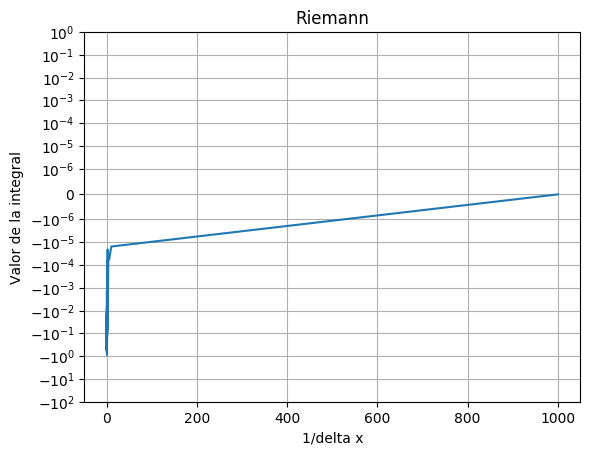

In [84]:
xlabel("1/delta x")
ylabel("Valor de la integral")
title("Riemann")
grid("on")
yscale("symlog",linthreshy=0.000001)
plot(r1,q1)
ylim(-100,1)
show();


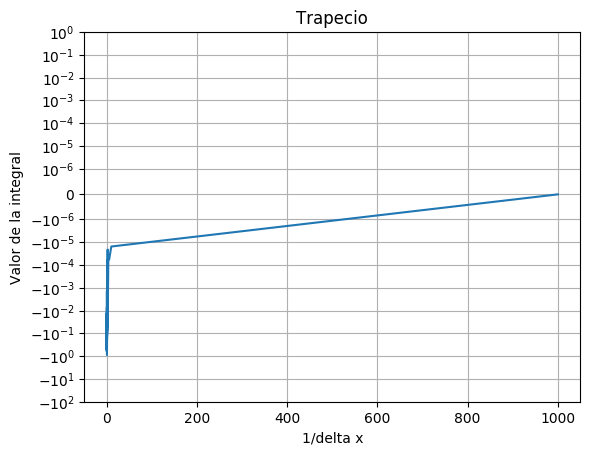

In [81]:
xlabel("1/delta x")
ylabel("Valor de la integral")
title("Trapecio")
grid("on")
yscale("symlog", linthreshy=0.000001)
plot(r1,w1)
ylim(-100,1)
show();


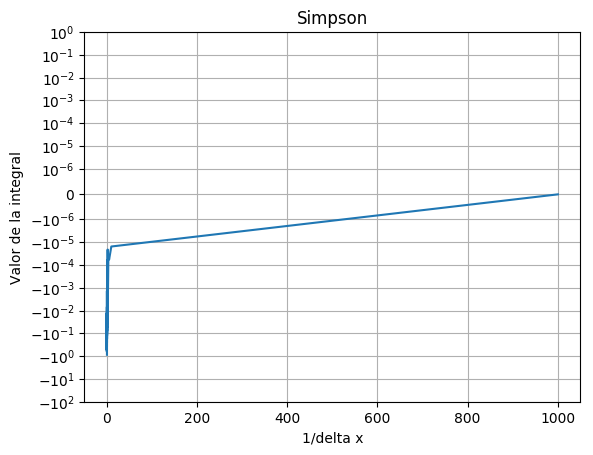

In [82]:
xlabel("1/delta x")
ylabel("Valor de la integral")
title("Simpson")
grid("on")
yscale("symlog", linthreshy=0.000001)
plot(r1,w1)
ylim(-100,1)
show();
